# WhatsApp Chat Analysis
<img src="https://dentistamauro.it/wp-content/uploads/2019/11/whatsapp-banner.jpg" />

## Libraries

In [125]:

import pandas as pd
import numpy as np
#import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [126]:
import re

def date_time(s):
    # Updated pattern to match 'DD.MM.YYYY HH:MM - ...'
    pattern = r'^([0-9]{2})(\.)([0-9]{2})(\.)([0-9]{4}) ([0-9]{1,2}):([0-9]{2}) -'
    result = re.match(pattern, s)

    if result:
        return True
    return False


In [127]:
def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

In [128]:


def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(" ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [129]:
# Load chat data
data = []
with open('026_yapay_zeka_kampi.txt', 'r', encoding='utf-8') as file:
    chat_data = file.readlines()
    messageBuffer = []
    date, time, author = None, None, None
    message_counts = {}
    for line in chat_data:
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)
        pass

In [130]:


print(messageBuffer)

print(data)

['Oğlunuz mu hocam çok tatlı ☺️']
[[None, None, None, '9.09.2024 22:45 - Mesajlar ve aramalar uçtan uca şifrelidir. WhatsApp da dahil olmak üzere bu sohbetin dışında bulunan hiç kimse mesaj ve aramalarınızı okuyamaz ve dinleyemez. Daha fazla bilgi edinmek için dokunun.'], ['26.04.2024', '19:20', None, '\u200e~\u202fZafer ACAR "026 Yapay Zeka Kampi" grubunu oluşturdu'], ['26.04.2024', '19:20', None, 'Eklendiniz'], ['11.09.2024', '12:03', None, '+90 505 637 99 07: arkadaşlar transfer learning için örnek bulamıyorum acaba ismen verir misiniz birkaç örnek  image classfction a bakıyorum siteden https://python.plainenglish.io/85-data-science-projects-c03c8750599e'], ['11.09.2024', '12:04', '+90 505 637 99 07', 'bayağı zaman kaybettim kaggle dan bulduklarım new notebook açmama izin vermiyor'], ['11.09.2024', '12:08', '+90 552 564 56 61', 'transfer learning bir proje örneği değil aslında, siz image classification projelerinde transfer learningden yararlanarak model geliştiriyorsunuz. bu projel

In [131]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])


<ipython-input-131-3e22e752aa02>:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [132]:
df.tail(20)

,Date,Time,Author,Message
226,2024-09-19,16:27,+90 552 564 56 61,diğer dataya da uygulamanız lazım
227,2024-09-19,16:27,+90 544 257 55 07,onu yapmadan
228,2024-09-19,16:27,+90 552 564 56 61,targetlaeınızı
229,2024-09-19,16:27,+90 552 564 56 61,2 dimensional areay yapmanız lazım bir de
230,2024-09-19,16:28,+90 552 564 56 61,<Medya dahil edilmedi>
231,2024-09-19,16:28,None,+90 544 257 55 07: # Eğer y_train ve y_val şu ...
232,2024-09-19,16:28,+90 552 564 56 61,bu şekilde veriyorsunuz x ve y yi
233,2024-09-19,16:30,+90 544 257 55 07,bunu uyguladığımda da çok saçma değerler çıkıy...
234,2024-09-19,16:30,+90 544 257 55 07,anlayamadım orasını
235,2024-09-19,16:36,+90 544 257 55 07,bu şekilde vermeden direk yaptım yine sorun ya...


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     245 non-null    datetime64[ns]
 1   Time     245 non-null    object        
 2   Author   236 non-null    object        
 3   Message  246 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 7.8+ KB


In [134]:
df.Author.unique()

array([None, '+90 505 637 99 07', '+90 552 564 56 61',
       '+90 544 257 55 07', '+90 505 524 87 27', '+90 544 340 81 95',
       '+49 177 5001798', '+1 (310) 954-6406'], dtype=object)

In [135]:
 #total message
total_messages = df.shape[0]

In [136]:
media_messages = df[df["Message"]=='<Medya dahil edilmedi>'].shape[0]
media_messages

27

In [137]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
links

4

In [138]:
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Links Shared", links)

Total Messages:  246
Number of Media Shared:  27
Number of Links Shared 4


There are 13124 words in all the messages.


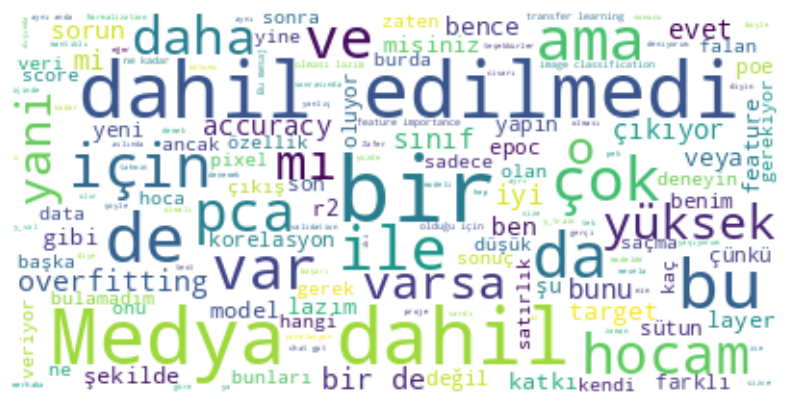

In [139]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Deep Learning

In [113]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [148]:
df['Message'] = df['Message'].str.replace(r"http\S+|www\S+|https\S+", '', case=False)  # Remove URLs
df['Message'] = df['Message'].str.replace(r"@[A-Za-z0-9]+", '', case=False)  # Remove mentions

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Message'])
sequences = tokenizer.texts_to_sequences(df['Message'])

# Padding sequences
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [140]:
# Drop rows with empty values in the 'Time' column
df = df.dropna(subset=['Time'])

# Convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')

<ipython-input-140-09e21a890305>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')


In [141]:
df.head()

,Date,Time,Author,Message,urlcount
1,2024-04-26,1900-01-01 19:20:00,None,"‎~ Zafer ACAR ""026 Yapay Zeka Kampi"" grubunu o...",0
2,2024-04-26,1900-01-01 19:20:00,None,Eklendiniz,0
3,2024-09-11,1900-01-01 12:03:00,None,+90 505 637 99 07: arkadaşlar transfer learnin...,1
4,2024-09-11,1900-01-01 12:04:00,+90 505 637 99 07,bayağı zaman kaybettim kaggle dan bulduklarım ...,0
5,2024-09-11,1900-01-01 12:08:00,+90 552 564 56 61,transfer learning bir proje örneği değil aslın...,0


In [142]:
df['daylight'] = ''

# Classify based on Time
for index, row in df.iterrows():
    time = pd.to_datetime(row['Time'], format='%H:%M').time()

    # Define daylight condition
    if time >= pd.to_datetime('06:00').time() and time <= pd.to_datetime('18:00').time():
        df.at[index, 'daylight'] = "day"
    else:
        df.at[index, 'daylight'] = "night"

In [143]:
# Creating dummy labels
# Since wie did not have any data to evaluate the messages emotionally, I evaluated them as day and night.
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df['daylight'])

In [144]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))  # Number of classes for sentiment

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [145]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [147]:
pad_sequences

<function keras.src.utils.sequence_utils.pad_sequences(sequences, maxlen=None, dtype='int32', padding='pre', truncating='pre', value=0.0)>

In [149]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8889 - loss: 0.4765 - val_accuracy: 0.8163 - val_loss: 0.6708
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9293 - loss: 0.2794 - val_accuracy: 0.8163 - val_loss: 0.5327
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8987 - loss: 0.3343 - val_accuracy: 0.8163 - val_loss: 0.4941
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9142 - loss: 0.3007 - val_accuracy: 0.8163 - val_loss: 0.5298
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8793 - loss: 0.3861 - val_accuracy: 0.8163 - val_loss: 0.5142
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9221 - loss: 0.2773 - val_accuracy: 0.8163 - val_loss: 0.5389
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9151 - loss: 0.2929 - val_accuracy: 0.8163 - val_loss: 0.5019
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9021 - loss: 0.3180 - val_accuracy: 0.8163 - val_loss